In [26]:
import chess
import chess.svg
from IPython.display import SVG
import random

In [ ]:
board = chess.Board()

In [ ]:
board

In [ ]:
board.push_san('e4')

In [ ]:
board.push_san('e5')

In [ ]:
board

In [ ]:
type(board.legal_moves)

In [ ]:
board = chess.Board()
True == board.push_san('e4')

# Program draft

In [2]:
import chess
#import chess.svg
import random
import pandas as pd
import numpy as np

board = chess.Board()
move_list = []

def play():
    while len(move_list) <8:
        chess_practice()
        if len(move_list) == 8:
          sys.exit()
        break

def chess_practice():
    
    player_color = color_picker()
   
    print(player_color)
    if player_color == 'w':
        player_move()
        
    elif player_color =='b':
        computer_move()
            
def color_picker():
    player_color = input("What color do you want to play: \n 'w' for White, 'b' for Black\n")
    return player_color

def player_move():
    move_string = input("Please enter your move. \n i.e. e4 or Nf3 \n")
    move_list.append(move_string)
    try: 
        board.push_san(move_string)
        return computer_move()
        
    except ValueError: 
        print("That is not a legal move. Legal moves are", board.legal_moves)
        print(board)
        player_move()

def computer_move():
    moves=['e5','d5','a5','b5']
    s = random.choice(moves)   
    
    try:
        board.push_san(s)
        move_list.append(s)
    except ValueError:
        computer_move()
    
    print(board)
    print(move_list)
    return player_move()

In [ ]:
play()

In [39]:
df = pd.read_csv("FICS_data_fixed.csv")
df = df[(df['5_q_buckets'] == '(951.0, 1518.0]') | (df['5_q_buckets'] == '(1842.0, 3228.0]')]

In [66]:
def generate_group(move_list):
    if len(move_list) ==1 :
        d =  df.groupby(['move1b','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d = d.unstack(level=1)
        return d
    elif len(move_list) ==2:
        d = df[(df['move1w'] == move_list[0]) & (df['move1b'] == move_list[1]) ].groupby(['move2w','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d=d.unstack(level=1)
        return d
      

In [67]:
def generate_chart(move_list):
    generate_group(move_list).plot(kind='bar')

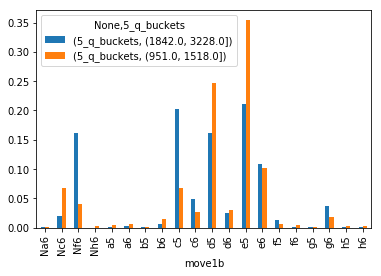

In [69]:
generate_chart(['e4'])